In [ ]:
#!pip install antspyx
#!pip install nipype

In [ ]:
import os
import numpy  as np
#import ants

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
print('done, mounted')

Mounted at /content/drive
done, mounted


In [ ]:
cd /content/drive/My Drive/newData/ABIDE

/content/drive/My Drive/newData/ABIDE


In [ ]:
root_dir = '/content/drive/My Drive/newData/ABIDE'
sites = os.listdir(root_dir)
scanners = [os.listdir(os.path.join(root_dir,site,'dicom')) for site in sites]

nsites = len(sites)

In [ ]:
print(sites)
print(scanners)

['olin', 'pitt', 'sjh', 'um', 'caltech', 'kul', 'mpg', 'kki', 'sbl', 'usm', 'sdsu', 'stanford', 'yale', 'nyu', 'ohsu', 'ucla1', 'ucla2']
[['allegra'], ['magnetom_allegra_syngo_mr_a30'], ['achieva'], ['signa'], ['triotim'], ['intera'], ['verio'], ['achieva'], ['intera'], ['triotim'], ['discovery_mr750'], ['signa'], ['triotim'], ['allegra'], ['triotim'], ['triotim'], ['triotim']]


In [ ]:
print(np.array(sites).flatten().shape)
print(np.array(scanners).flatten().shape)

(17,)
(17,)


In [ ]:
temp = [np.array(os.listdir(os.path.join(root_dir,sites[i],'dicom',scanners[i][0],'mmilham','abide_28730'))) for i in range(nsites)]
print('done')

done


In [ ]:
subvec = temp[0]
for i in range(1,nsites):
  subvec = np.hstack((subvec,temp[i]))
subvec.shape

(1109,)

In [ ]:
subfolders = os.listdir(os.path.join(subpath,sessions[0]))

NameError: ignored

In [ ]:
mprage = [folder for folder in subfolders if 'mprage' in folder]
mprage

['mprage_0001']

In [ ]:
os.path.join(subpath,sessions[0],mprage[0],'MPRAGE.nii.gz')

'/content/drive/My Drive/newData/ABIDE/ohsu/dicom/triotim/mmilham/abide_28730/A00032259/443558212_session_1/mprage_0001/MPRAGE.nii.gz'

In [ ]:
subpath = os.path.join(root_dir,sites[i],'dicom',scanners[i][0],'mmilham','abide_28730',temp[i][5])
sessions = os.listdir(subpath)

im = ants.image_read(os.path.join(subpath,sessions[0],mprage[0],'MPRAGE.nii.gz'))
#im = ants.resample_image(im, (64,64,64),use_voxels=True,interp_type=1)
im = ants.n3_bias_field_correction(im, 2)
mask = ants.get_mask(im)
seg = ants.kmeans_segmentation(im, k=3,kmask=mask, mrf=0.15)
priorseg = ants.prior_based_segmentation(im, seg['probabilityimages'], mask,  priorweight=0.15, mrf=0.15, iterations=75)


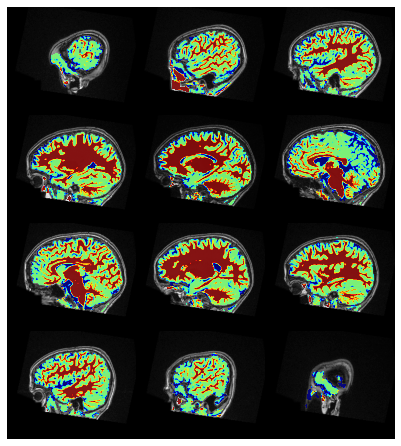

In [ ]:
im.plot(overlay=priorseg['segmentation'])

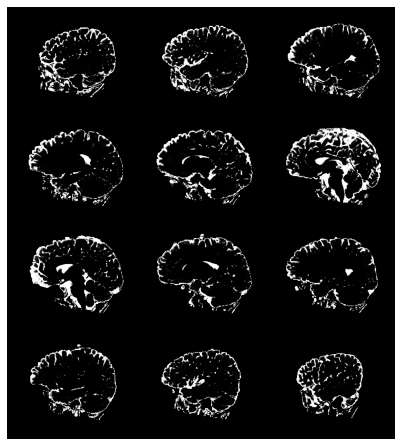

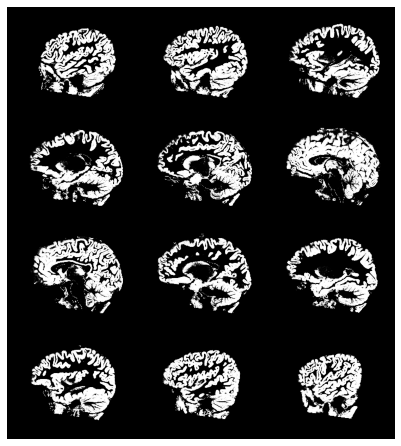

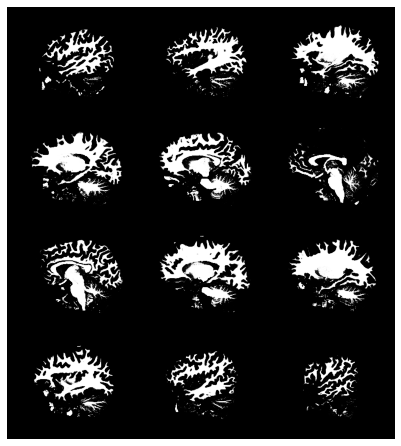

In [ ]:
priorseg['probabilityimages'][0].plot()
priorseg['probabilityimages'][1].plot()
priorseg['probabilityimages'][2].plot()

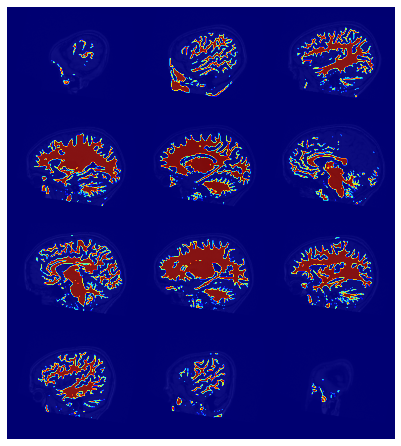

In [ ]:
im.plot(overlay=priorseg['segmentation']==3)